# Introduction to machine learning

Fundamentally, machine learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

**Supervised learning** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.

**Unsupervised learning** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.

Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

sns.set_style(style="whitegrid") # set style

### Examples of supervised learning algorithms:

Classification Example

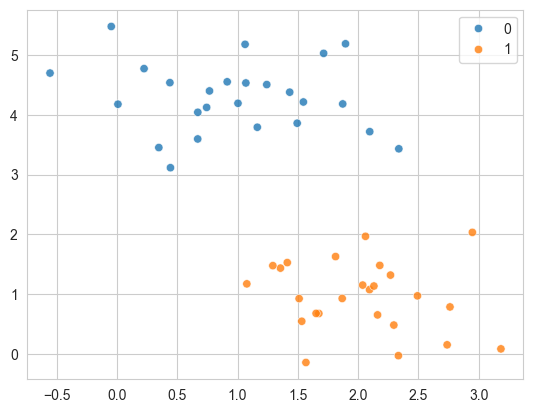

In [2]:
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# plot the data

sns.scatterplot(x= X[:, 0], y= X[:, 1], hue= y, alpha = .8)
plt.show()

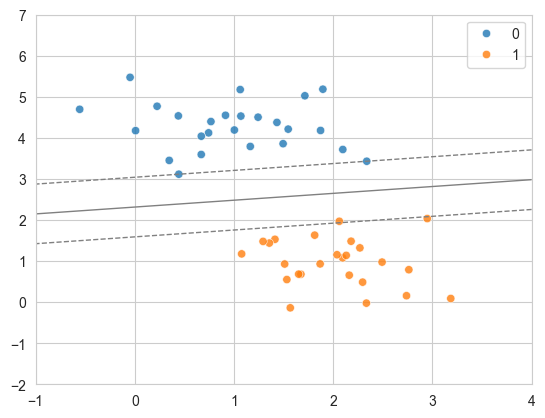

In [3]:
# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
sns.scatterplot(x= X[:, 0], y= X[:, 1], hue= y, alpha = .8)
plt.contour(xy1, xy2, Z,levels = [-1.0, 0.0, 1.0],linestyles = ['dashed', 'solid', 'dashed'],colors = 'gray', linewidths=1)
plt.show()

<Axes: >

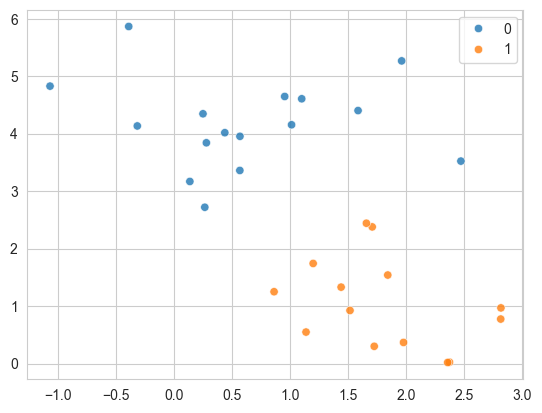

In [7]:
# Now that this model has been trained, it can be generalized to new, unlabeled data. 

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

sns.scatterplot(x= X2[:, 0], y= X2[:, 1], hue= y2, alpha = .8)

### Examples of unsupervised learning algorithms:

Clustering: Inferring labels on unlabeled data

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


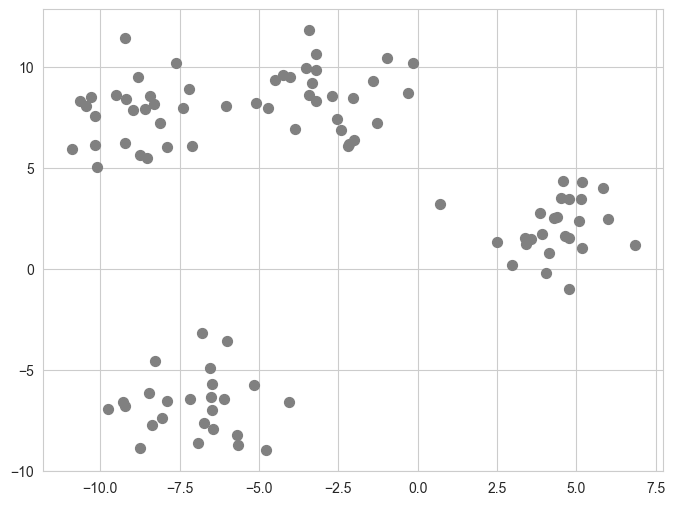

In [12]:
# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.show()

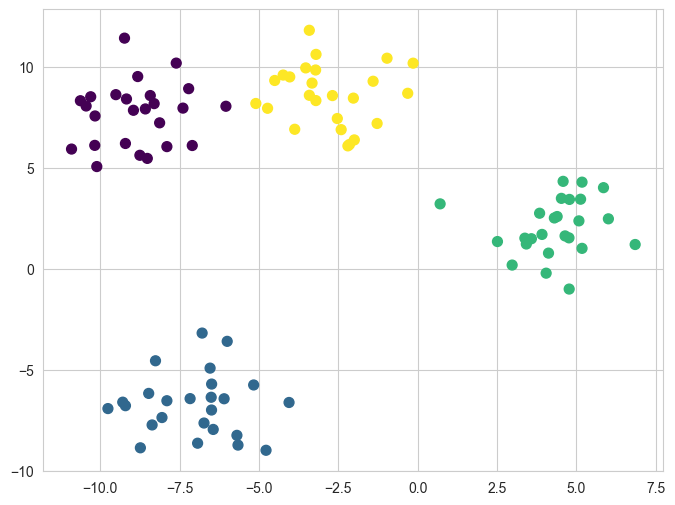

In [14]:
# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
plt.show()

# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

In [16]:
# Data Representation in Scikit-Learn

# Get data as tables (df)

import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
10,5.4,3.7,1.5,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
122,7.7,2.8,6.7,2.0,virginica
29,4.7,3.2,1.6,0.2,setosa


In [19]:
# We'll extract the features matrix and target vector from the DF

X_iris = iris.drop('species', axis=1)
y_iris = iris.species

(150, 4)

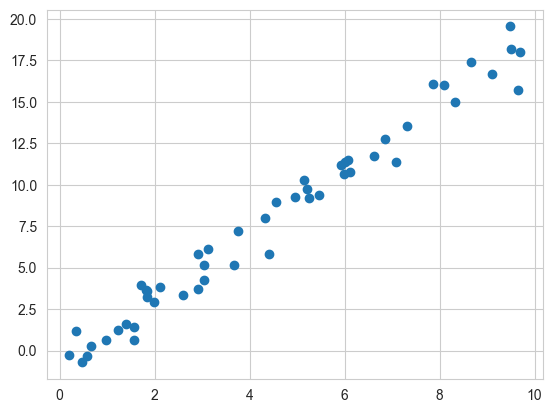

In [36]:
# Supervised learning example: Simple linear regression

rng = np.random.RandomState(42)
x = 10*rng.rand(50) # uniformly distributed between 0 and 10 [0,1]
y = 2* x - 1 + rng.randn(50) # Linear equation 

plt.scatter(x, y)
plt.show()

In [23]:
# 1. Choose a class of model

# Each model is represented by a Python class, so, we have to import each model like a different class

from sklearn.linear_model import LinearRegression

In [24]:
# 2. Choose model hyperparameters

# Depending on the model class we are working with, we might need to answer one or more questions (instances)

model = LinearRegression(fit_intercept=True) # fit the intercept
model

# We have not yet applied the model to any data, we've just chosen the best model

LinearRegression()

In [37]:
# 3. Arrange data into a features matrix and target vector¶

X = x.reshape(50,1)
X.shape

(50, 1)

In [38]:
# 4. Fit the model to your data

# We can apply our model using fit()

model.fit(X,y)

LinearRegression()

In [42]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores

print('The computed slope is: ',model.coef_)
print('The computed intercept is: ', model.intercept_)

# we see that they are very close to the input  slope of 2 and intercept of -1.


The computed slope is:  [1.9776566]
The computed intercept is:  -0.903310725531111


In [45]:
# 5. Predict labels for unknown data

# Now, we want to evaluate it with new data. 
# We use the predict() method

xfit = np.linspace(-1,11).reshape(50,1)
yfit = model.predict(xfit)


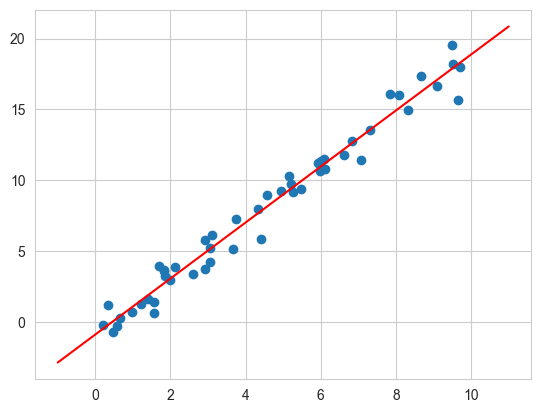

In [47]:
plt.scatter(x,y)
plt.plot(xfit,yfit, color = 'red')
plt.show()